### Logistic Regression

This model is built using simple Logistic Regression. Text data is transformed into feature vectors using TFIDF on both words as well as characters.

In [2]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.sparse import hstack
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
def load_data():
    '''
    Load data from csv files.
    :return train_data: Pandas dataframe of complete train data
    :return test_data: Pandas dataframe of complete test data
    :return train_text: Pandas series of text comments in train data
    :return test_text: Pandas series of text comments in test data
    :return all_text: train_text and test_text combined together
    '''
    # Load data
    train_data = pd.read_csv('./data/train.csv').fillna(' ')
    test_data = pd.read_csv('./data/test.csv').fillna(' ')

    # Take comment data
    train_text = train_data['comment_text']
    test_text = test_data['comment_text']
    
    # Combine train and test
    combine_text = pd.concat([train_text, test_text])
    return train_data, test_data, train_text, test_text, combine_text

In [4]:
def get_vectorized_features(train_text, test_text, combine_text):
    '''
    This function applied tf-idf technique on both words and characters
    in the text comments to feed to Logistic Regression classifier.
    :param train_text: Pandas series containing train comments
    :param test_text: Pandas series containing test comments
    :param combine_text: Pnadas series contaning combined train and text comments
    :return combined word and character vectorized features for both
        train and test text data
    '''
    
    # For words
    word_vect = TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', 
                                      analyzer='word',token_pattern=r'\w{1,}',
                                      stop_words='english',ngram_range=(1, 1),
                                      max_features=10000)
    word_vect.fit(combine_text)
    train_wordFeatures = word_vect.transform(train_text)
    test_wordFeatures = word_vect.transform(test_text)

    # For characters
    char_vect = TfidfVectorizer(
        sublinear_tf=True,
        strip_accents='unicode',
        analyzer='char',
        stop_words='english',
        ngram_range=(2, 6),
        max_features=50000
    )
    char_vect.fit(combine_text)
    train_charFeatures = char_vect.transform(train_text)
    test_charFeatures = char_vect.transform(test_text)

    # Stack word and character features for train
    train_features = hstack([train_charFeatures, train_wordFeatures])
    # Stack word and character features for test
    test_features = hstack([test_charFeatures, test_wordFeatures])
    
    return train_features, test_features

In [5]:
def run_classifier(train, test, train_features, test_features):
    '''
    Runs Logistic Regression model for each individual class as one comment
    can have multiple class labels.
    :param train: Pandas dataframe of complete train data
    :param test: Pandas dataframe of complete test data
    :param train_features: Vectorized TFIDF features of text comments in
        the train data
    :param test_features: Vectorized TFIDF features of text comments in
        the test data        
    '''
    scores = []
    class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    
    # Create empty dataframe with each class label to store predictions
    result = pd.DataFrame.from_dict({'id': test['id']})
    
    # Run for every class
    for class_name in class_names:
        # Get labels for current class from train data
        train_target = train[class_name]
        # Create a classifier
        classifier = LogisticRegression(C=0.1, solver='sag')
        # Fit the data
        classifier.fit(train_features, train_target)
        # Predict
        result[class_name] = classifier.predict_proba(test_features)[:, 1]
    #print('Total CV score is {}'.format(np.mean(scores)))

    # Save prediction results (probabilities) to a csv file to analyze later
    result.to_csv('logistic_results.csv', index=False)

Training Data distribution
Training Done


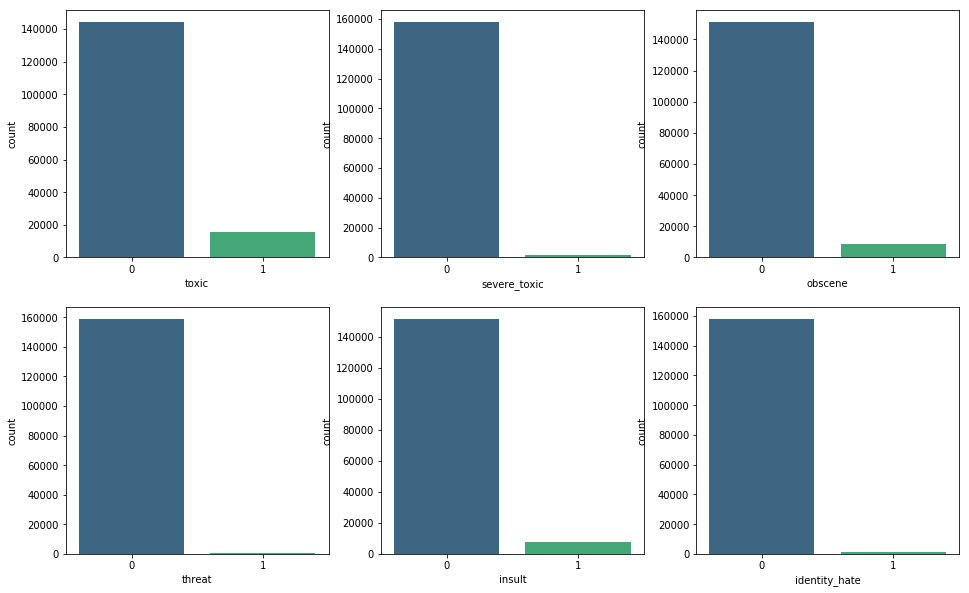

In [6]:
# Load data
train_data, test_data, train_text, test_text, all_text = load_data()

print('Training Data distribution')
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train_data['toxic'],palette= 'viridis',ax=ax1)
sns.countplot(train_data['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train_data['obscene'], palette= 'viridis',ax=ax3)
sns.countplot(train_data['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train_data['insult'], palette = 'viridis',ax=ax5)
sns.countplot(train_data['identity_hate'], palette = 'viridis', ax = ax6)

print('Training Done')


In [66]:
# # Get vectorized features using TFIDF on words as well as characters
train_features, test_features = get_vectorized_features(train_text, test_text, all_text)
print('Obtained Vectorized features')


Obtained Vectorized features


In [67]:
# # Run the model
run_classifier(train_data, test_data, train_features, test_features)
print('Ran classifier successfully')

/Users/gaurav/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gaurav/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Total CV score is nan
Ran classifier successfully


In [68]:
output = pd.read_csv('./logistic_results.csv')

In [47]:
print(output)

                      id     toxic  severe_toxic   obscene    threat  \
0       00001cee341fdb12  0.982228      0.087444  0.956477  0.012206   
1       0000247867823ef7  0.027559      0.005408  0.017161  0.002533   
2       00013b17ad220c46  0.026834      0.005304  0.015824  0.002480   
3       00017563c3f7919a  0.013824      0.003824  0.010002  0.002263   
4       00017695ad8997eb  0.060083      0.004325  0.022016  0.002388   
5       0001ea8717f6de06  0.020064      0.004348  0.011832  0.002964   
6       00024115d4cbde0f  0.016450      0.003041  0.011307  0.001712   
7       000247e83dcc1211  0.246539      0.007243  0.047921  0.003706   
8       00025358d4737918  0.025716      0.003041  0.016132  0.002068   
9       00026d1092fe71cc  0.018060      0.003151  0.012630  0.002093   
10      0002eadc3b301559  0.131311      0.002790  0.041520  0.002108   
11      0002f87b16116a7f  0.094675      0.003842  0.028435  0.002418   
12      0003806b11932181  0.015780      0.002708  0.008506  0.00

In [70]:
accuracy_n_loss = pd.read_csv('./average_logistic.csv')

In [71]:
print(accuracy_n_loss)

   0.9754785499182012
0            0.881365
1            0.846944
2            0.024521
